# Assignament 1: sampling and quantization of images

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import matplotlib.colors as mcolors

### 1.  Image Processing and Analysis: getting started

##### 1.1 Download the single channel image ‘crossroad.dat’ using the command read function in Python. The data consist of unsigned integers 8 bits in size, so use uint8 type.   

In [ ]:
#Reading data (the image)
image_dat = np.fromfile("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 1 - IP\\IP1\\IP1\\crossroad.dat", dtype=np.uint8)

In [4]:
#Dimensionality
len(image_dat)
#252300

252300

##### 1.2 Is it possible to display the image using imshow or any other showing image function in Python? What information is missing? Then assume that the image is 435 lines long and use the function reshape to organize data in memory.  

In [5]:
#Assuming the number of rows given is 435
n_rows = 435
n_cols = len(image_dat)/n_rows
n_cols = int(n_cols)
n_cols #580

580

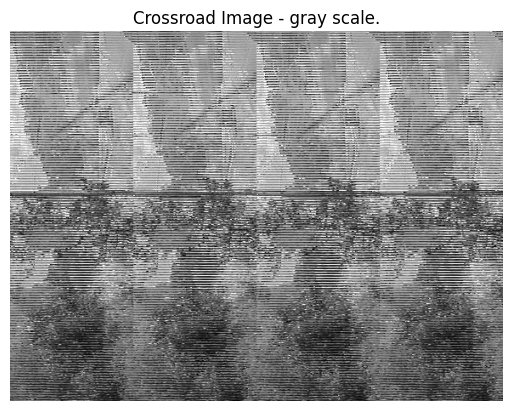

In [161]:
#Reshape
reshaped_image_dat = image_dat.reshape((n_rows, n_cols))

#Plot gray scale
plt.imshow(reshaped_image_dat, cmap='gray')
plt.title("Crossroad Image - gray scale.")
plt.axis("off")  #Don't show the axes
plt.show()

##### 1.3 Here is the interest of image file format, isn’t it easier using the file ‘crossroad.bmp’? Use the command read for (‘crossroad.bmp’) directly.

In [ ]:
#Loading the image 'crossroad.bmp'
image_bmp = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 1 - IP\\IP1\\IP1\\crossroad.bmp")

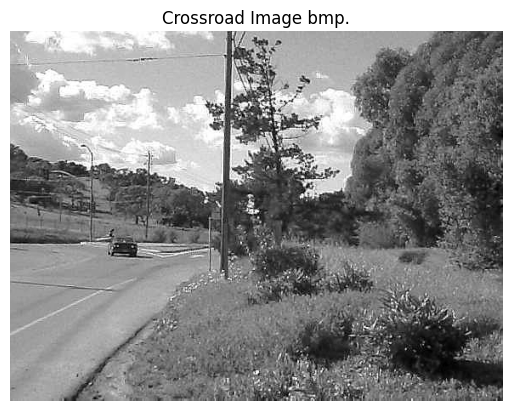

In [165]:
#Plot
plt.imshow(image_bmp, cmap='gray')
plt.title("Crossroad Image bmp.")
plt.axis("off")  #Remove axes
plt.show()

##### 1.4 See the gray levels in the workspace and analyze the first pixel. Row? Column? Value?

In [13]:
#Converting the image into an array
image_bmp_array = np.array(image_bmp)

#Analizying the first pixel in top left in position [0,0]
first_pixel_bmp = image_bmp_array[0, 0]

##### 1.5 Display the value of this first pixel in the command window. And the bottom right corner pixel? Use the size function.

In [14]:
#Showing the the row, the column and the value of the first pixel. We use print() for the command window
print(f"The first pixel in [0,0] has a value of gray level of: {first_pixel_bmp}.")

The first pixel in [0,0] has a value of gray level of: 187.


In [15]:
#Checking that the information are still the same we registered in the steps before
print("The total pixels are: ", np.size(image_bmp_array))
print("Shapes: ", image_bmp_array.shape)

The total pixels are:  252300
Shapes:  (435, 580)


In [16]:
#Analizying the first pixel in top left in position [434,579]
last_pixel_bmp = image_bmp_array[n_rows-1, n_cols-1]
print(f"The last pixel in [434,579] has a value of gray level of: {last_pixel_bmp}.")

The last pixel in [434,579] has a value of gray level of: 72.


##### 1.6 Create a vector L1 as a copy of the first row of this image. Then a vector C1 for the first column. Display them using bar or plot. Choosing some columns of ‘sonnet’, what can we conclude about the acquisition step?

In [17]:
L1 = image_bmp_array[0,:] #First row vector
C1 = image_bmp_array[:,0] #First column vector

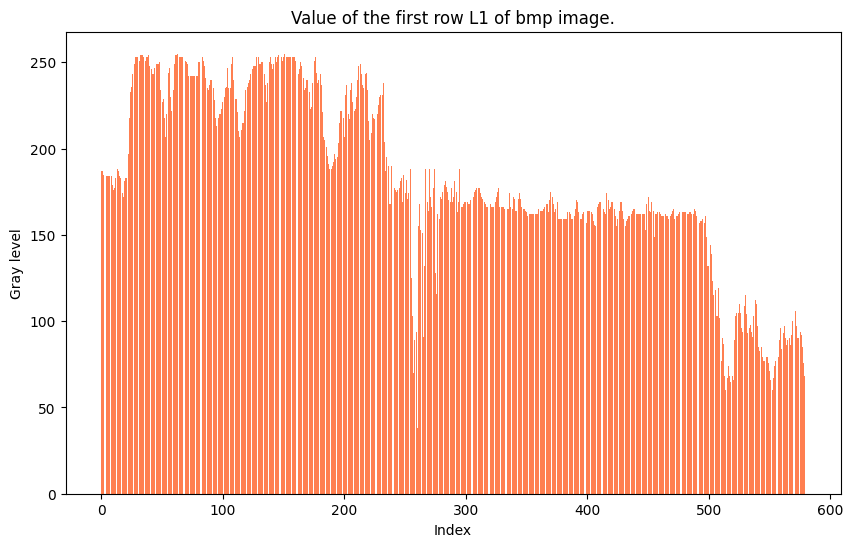

In [169]:
#Plot L1
plt.figure(figsize=(10, 6))
plt.bar(range(len(L1)), L1, color='coral')
plt.title("Value of the first row L1 of bmp image.")
plt.xlabel("Index")
plt.ylabel("Gray level")
plt.show()

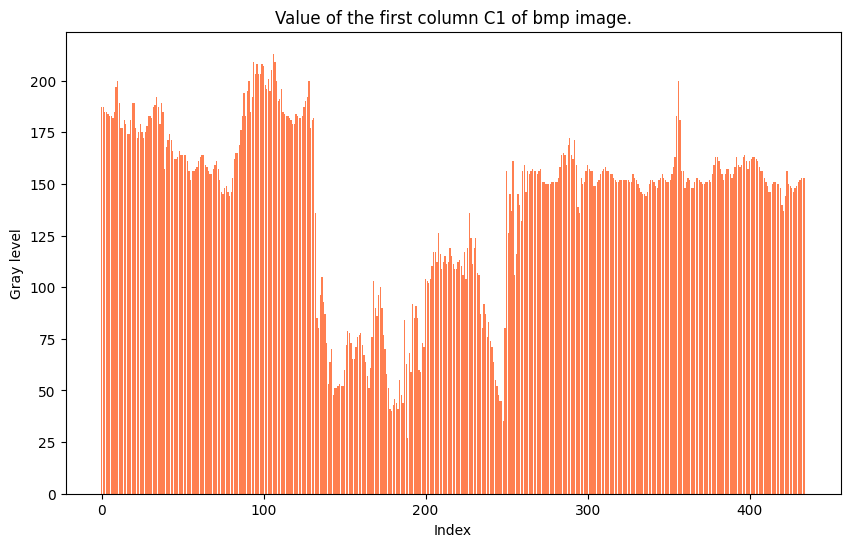

In [168]:
#Plot C1
plt.figure(figsize=(10, 6))
plt.bar(range(len(C1)), C1, color='coral')
plt.title("Value of the first column C1 of bmp image.")
plt.xlabel("Index")
plt.ylabel("Gray level")
plt.show()

In [ ]:
#Loading the image 'sonnet'
image_sonnet = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 1 - IP\\IP1\\IP1\\sonnet.png")

#Transforming the image into array
image_sonnet_array = np.array(image_sonnet)

image_sonnet_array.shape #Dimensions

(510, 384)

In [38]:
#Taking some columns
C1_sonnet = image_sonnet_array[:,0] #First column
Clast_sonnet = image_sonnet_array[:,384-1] #Last column
C200_sonnet = image_sonnet_array[:,200-1] #Other column

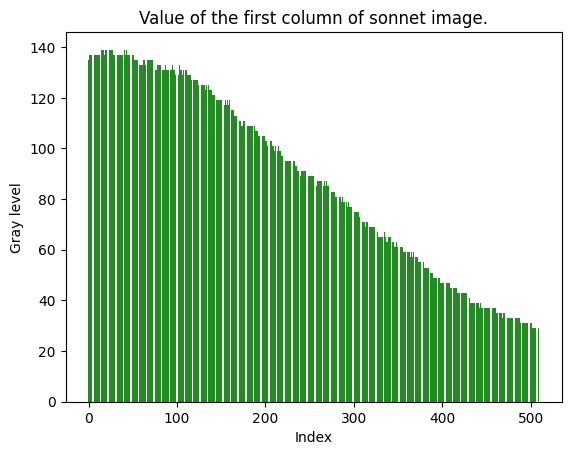

In [171]:
plt.bar(range(len(C1_sonnet)), C1_sonnet, color="forestgreen")
plt.title("Value of the first column of sonnet image.")
plt.xlabel("Index")
plt.ylabel("Gray level")
plt.show()

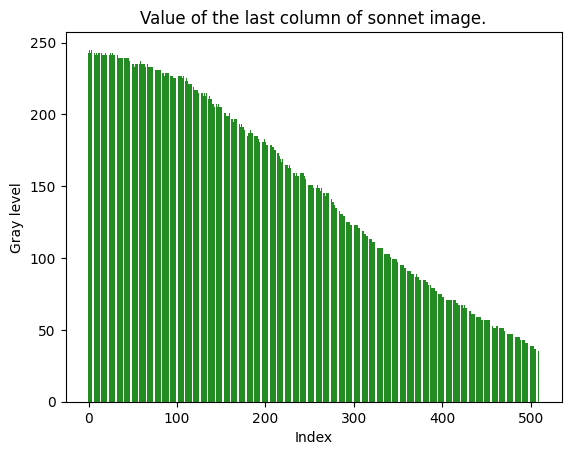

In [173]:
plt.bar(range(len(Clast_sonnet)), Clast_sonnet, color="forestgreen")
plt.title("Value of the last column of sonnet image.")
plt.xlabel("Index")
plt.ylabel("Gray level")
plt.show()

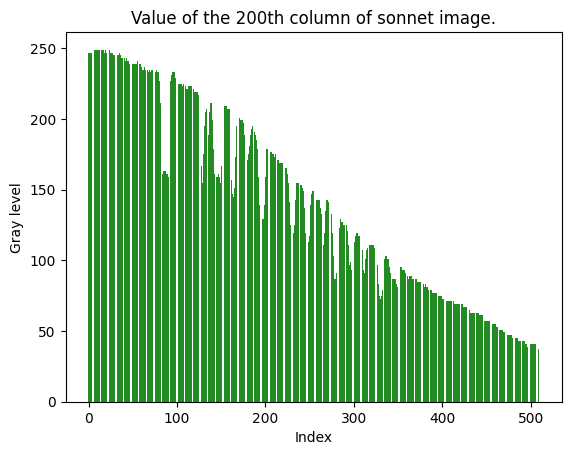

In [176]:
plt.bar(range(len(C200_sonnet)), C200_sonnet, color="forestgreen")
plt.title("Value of the 200th column of sonnet image.")
plt.xlabel("Index")
plt.ylabel("Gray level")
plt.show()

##### 1.7 Display the entire image.  

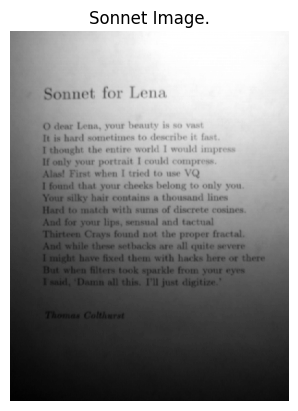

In [178]:
#Plot
plt.imshow(image_sonnet, cmap='gray')
plt.title("Sonnet Image.")
plt.axis("off")  #Remove axes
plt.show()

##### 1.8 Store this image with different formats (png, tif, jpg).

In [47]:
#Saving (no in png format since it is the original format of the image)
image_sonnet.save("sonnet.tif")
image_sonnet.save("sonnet.jpg")

### 2. Resolution  
##### 2.1 Using ‘crossroad’ image, change the resolution with boxes 2, 4, 8 and 16 pixels on a side and observe the results. What features do you lose at each resolution size? 
##### i) Using basic subsampling method, where only one pixel over 2 for example is stored each line and column, see the colon (:) operator,  

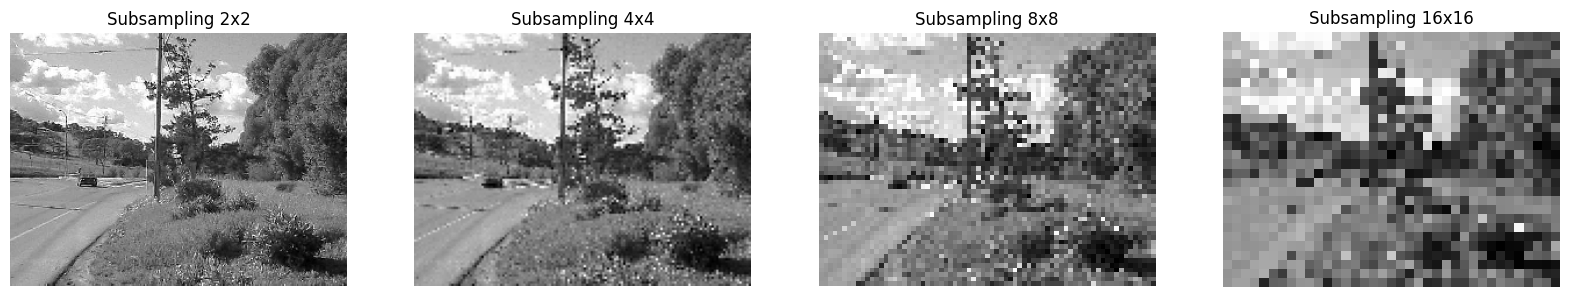

In [ ]:
#Resolutions
res_boxes = [2,4,8,16]

plt.figure(figsize=(20, 10))
for i, n in enumerate(res_boxes):
    #Subsampling the image every n pixels
    subsampled_image = image_bmp_array[::n, ::n]
    
    #Plot of the subsampled image
    plt.subplot(1, len(res_boxes), i + 1)
    plt.imshow(subsampled_image, cmap='gray')
    plt.title(f'Subsampling {n}x{n}')
    plt.axis('off') #Without axes

plt.show()

##### ii) Using resize function.

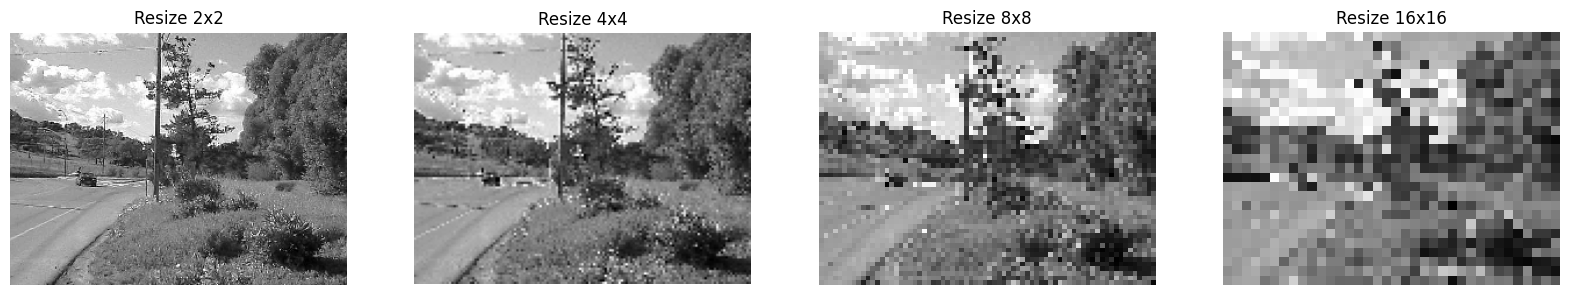

In [ ]:
plt.figure(figsize=(20, 10))
for i, n in enumerate(res_boxes):
    #Ridimensioning the image with resize function from PIL
    resized_image = image_bmp.resize(
        (image_bmp.width // n, image_bmp.height // n), Image.Resampling.NEAREST
    )
    
    #Plot resized image
    plt.subplot(1, len(res_boxes), i + 1)
    plt.imshow(resized_image, cmap='gray')
    plt.title(f'Resize {n}x{n}')
    plt.axis('off')

plt.show()

##### 2.2 Same questions with images ‘test pattern’ and ‘patterns’. 

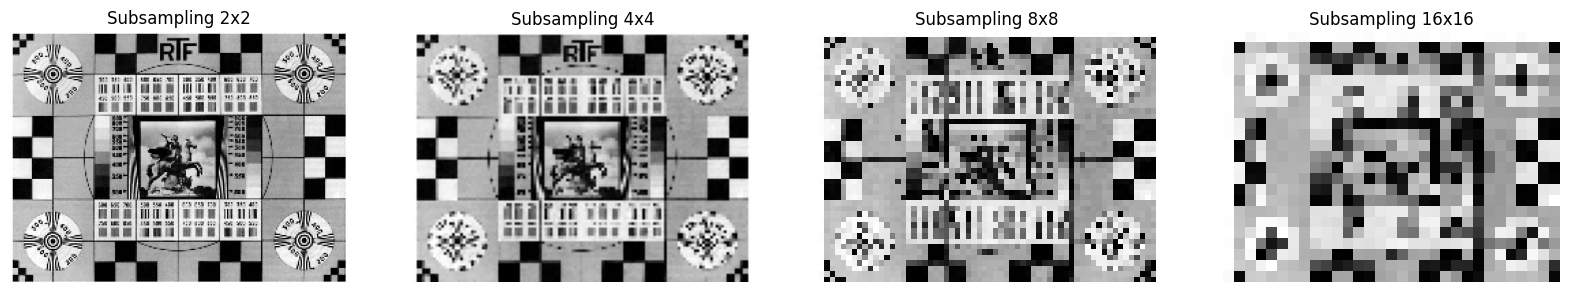

In [ ]:
#Loading the image 'test pattern'
image_test_pattern = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 1 - IP\\IP1\\IP1\\test pattern.jpg")
image_test_array = np.array(image_test_pattern)

# i) Subsampling method
plt.figure(figsize=(20, 10))
for i, n in enumerate(res_boxes):
    #Subsampling the image every n pixels
    subsampled_image = image_test_array[::n, ::n]
    
    #Plot of the subsampled image
    plt.subplot(1, len(res_boxes), i + 1)
    plt.imshow(subsampled_image, cmap='gray')
    plt.title(f'Subsampling {n}x{n}')
    plt.axis('off') #Without axes

plt.show()

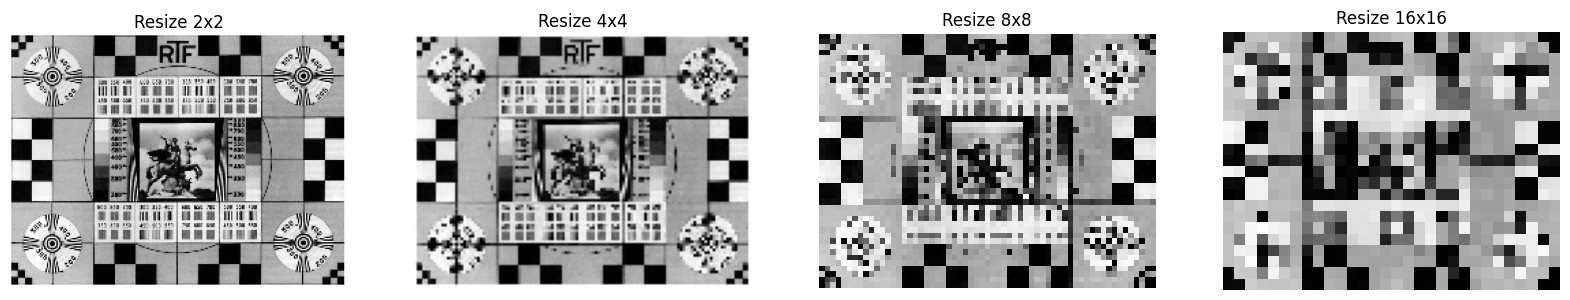

In [53]:
# ii) Resizing method
plt.figure(figsize=(20, 10))
for i, n in enumerate(res_boxes):
    #Ridimensioning the image with resize function from PIL
    resized_image = image_test_pattern.resize(
        (image_test_pattern.width // n, image_test_pattern.height // n), Image.Resampling.NEAREST
    )
    
    #Plot resized image
    plt.subplot(1, len(res_boxes), i + 1)
    plt.imshow(resized_image, cmap='gray')
    plt.title(f'Resize {n}x{n}')
    plt.axis('off')

plt.show()

In [ ]:
#Loading the image 'patterns'
image_patterns = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 1 - IP\\IP1\\IP1\\patterns.png")
image_patterns_array = np.array(image_patterns)

image_patterns_array.shape

(128, 256, 2)

In [ ]:
#We select just the first channel to obtain an image in gray scale
image_patterns_array = image_patterns_array[:, :, 0]

#The channel 1 show completely black images. This means that the channel 1 contains just 0 values for all the pixels, and it is like an empty channel.

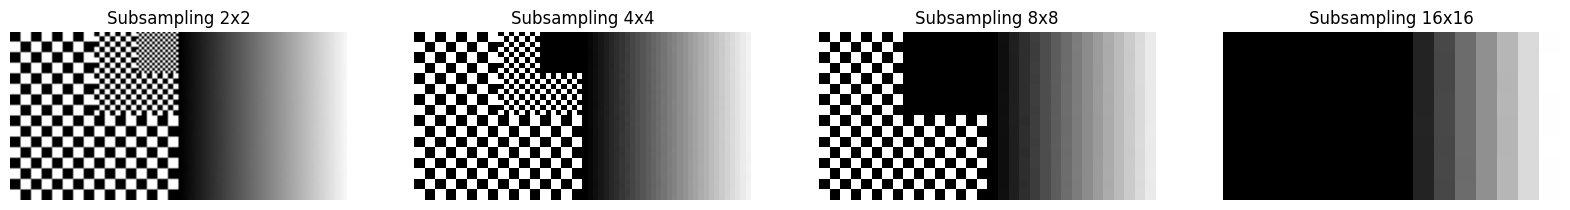

In [73]:
# i) Subsampling method
plt.figure(figsize=(20, 10))
for i, n in enumerate(res_boxes):
    #Subsampling the image every n pixels
    subsampled_image = image_patterns_array[::n, ::n]
    
    #Plot of the subsampled image
    plt.subplot(1, len(res_boxes), i + 1)
    plt.imshow(subsampled_image, cmap='gray')
    plt.title(f'Subsampling {n}x{n}')
    plt.axis('off') #Without axes

plt.show()

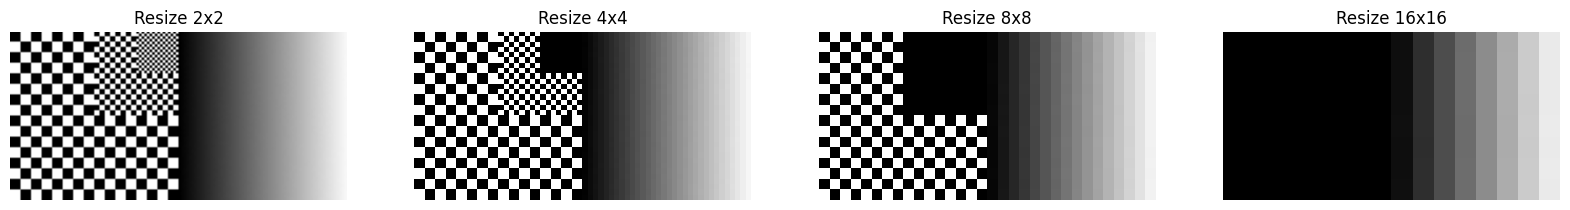

In [57]:
# ii) Resizing method
plt.figure(figsize=(20, 10))
for i, n in enumerate(res_boxes):
    #Ridimensioning the image with resize function from PIL
    resized_image = image_patterns.resize(
        (image_patterns.width // n, image_patterns.height // n), Image.Resampling.NEAREST
    )
    
    #Plot resized image
    plt.subplot(1, len(res_boxes), i + 1)
    plt.imshow(resized_image, cmap='gray')
    plt.title(f'Resize {n}x{n}')
    plt.axis('off')

plt.show()

### 3. 3. Quantization  

##### 3.1 Considering the previous images with data of type uint8, the data consists of eight bits for each pixel. The gray levels are from 0 to 255, ie 256 classes. Create new images with 128, 64, 32, 16, 8, 4, and 2 gray levels. If necessary, dec2bin convert decimal to binary number in string, bitget get bit at specified position and bitset set bit at specific location while bitshift shift bits specified number of places.
##### 3.2 How many bits are needed to preserve image quality? Does it change from place to place in the image? How so?

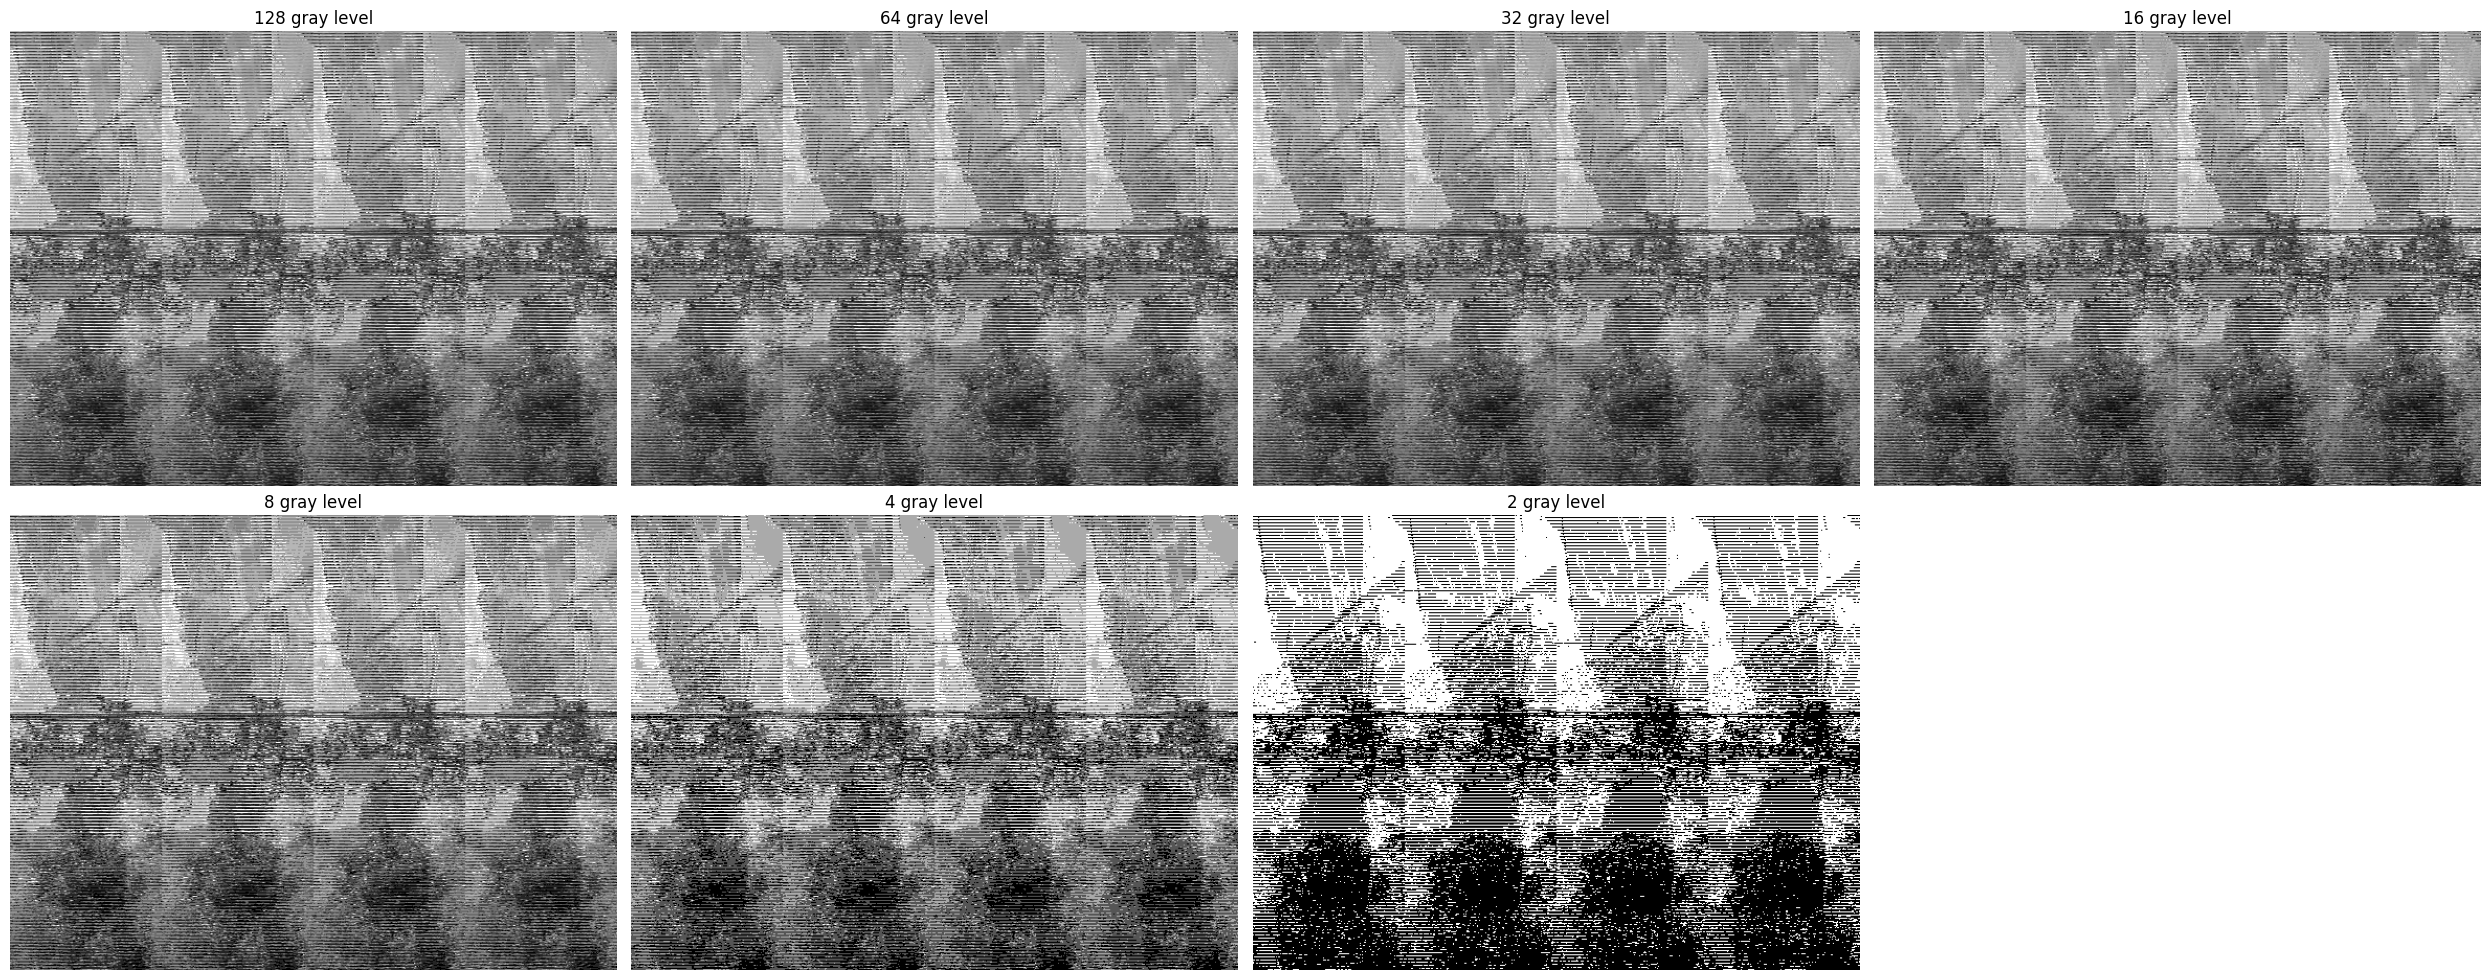

In [ ]:
#Function to quntize the image
def quantize_fun(image, level):
    step = 256 // level
    image_quantized = (image // step) * step
    return(image_quantized)

#Gray levels
gray_levels = [128, 64, 32, 16, 8, 4, 2]

#a) Image crossroad dat
#array format
image_dat_array = np.array(reshaped_image_dat)

plt.figure(figsize=(25, 10))
for i, levels in enumerate(gray_levels):
    quantized_image = quantize_fun(image_dat_array, levels)
    plt.subplot(2, 4, i + 1)
    plt.imshow(quantized_image, cmap='gray')
    plt.title(f'{levels} gray level')
    plt.axis('off')

plt.tight_layout()
plt.show()

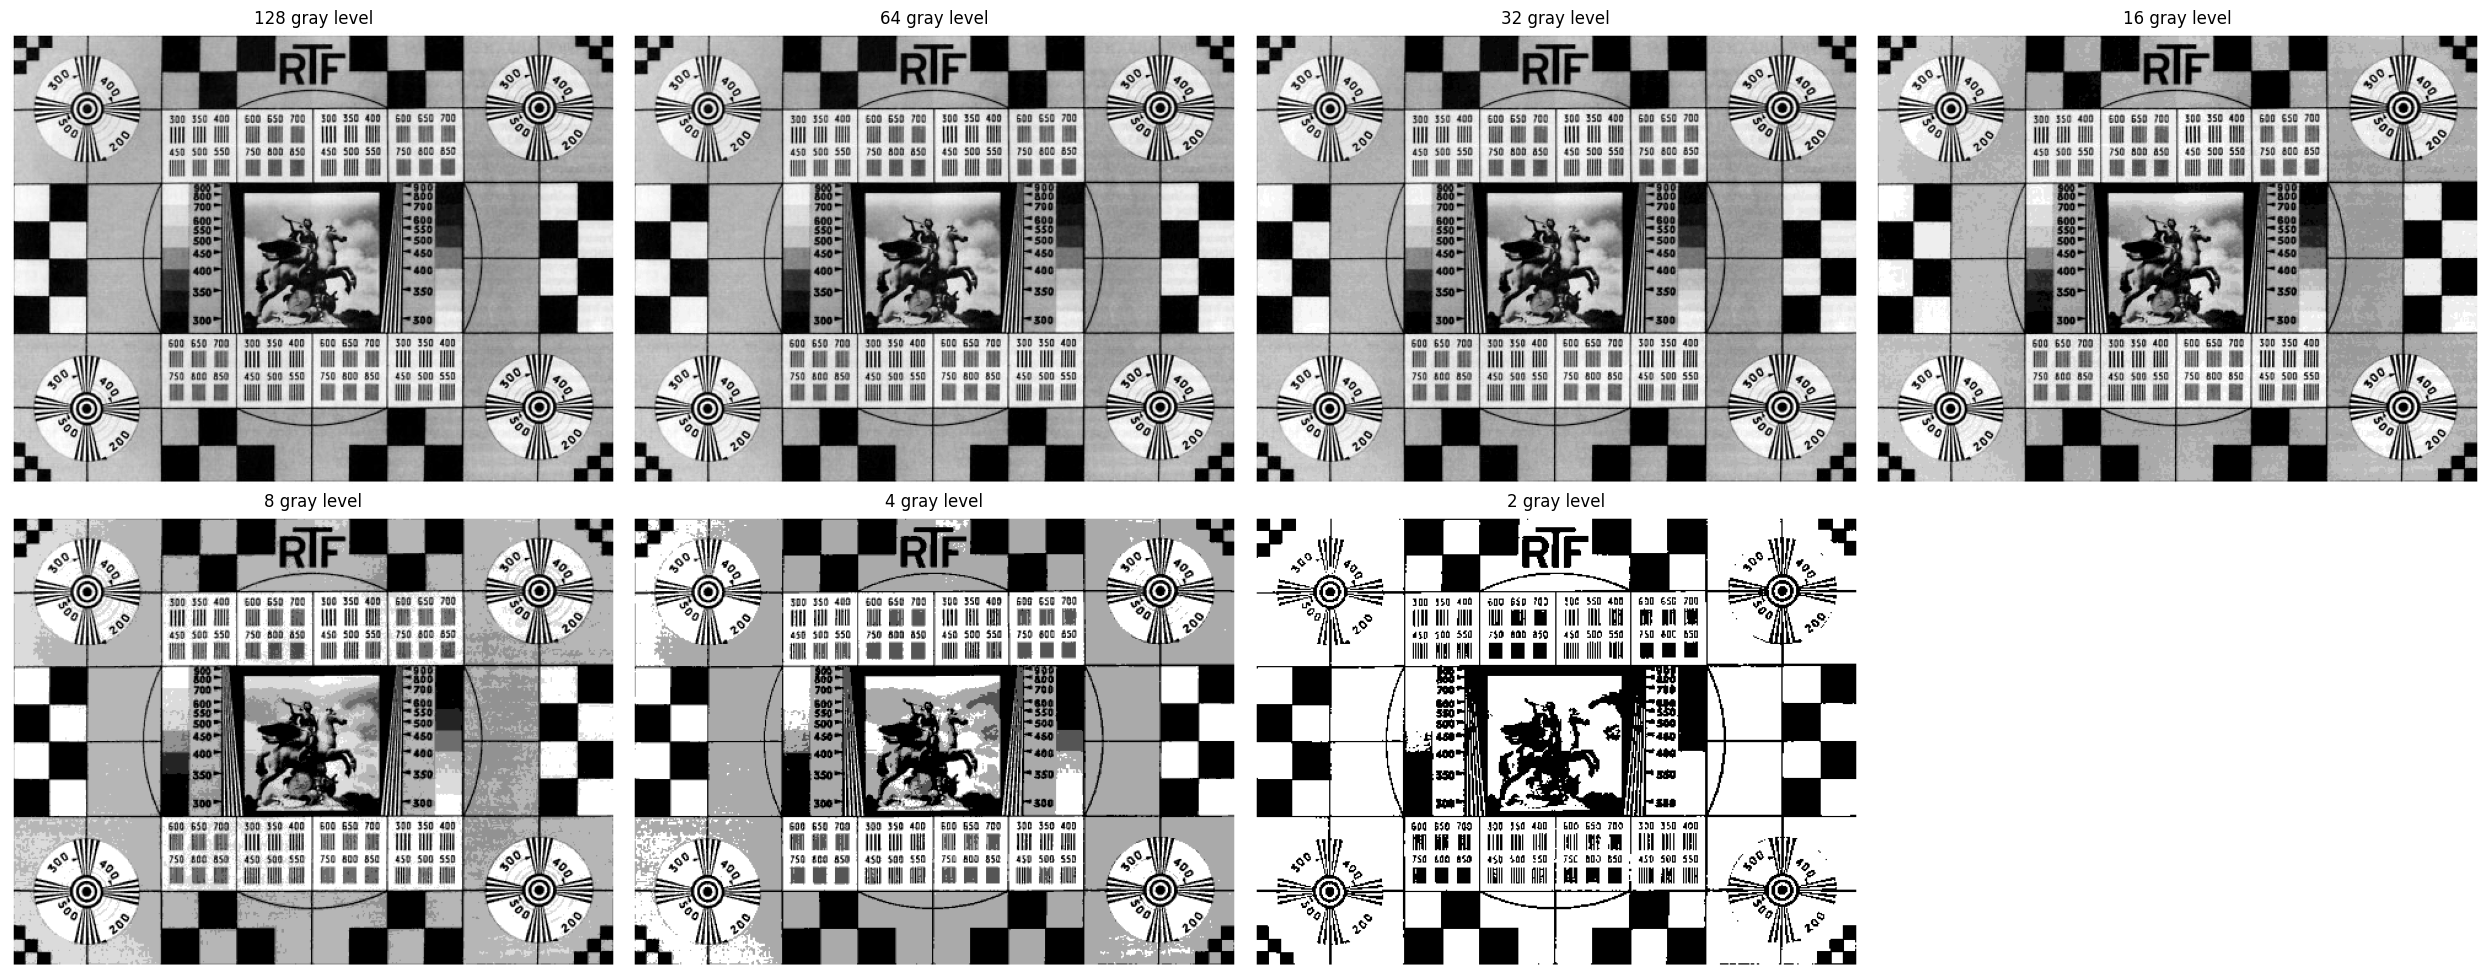

In [ ]:
#b) Image test pattern
plt.figure(figsize=(25, 10))
for i, levels in enumerate(gray_levels):
    quantized_image = quantize_fun(image_test_array, levels)
    plt.subplot(2, 4, i + 1)
    plt.imshow(quantized_image, cmap='gray')
    plt.title(f'{levels} gray level')
    plt.axis('off')

plt.tight_layout()
plt.show()

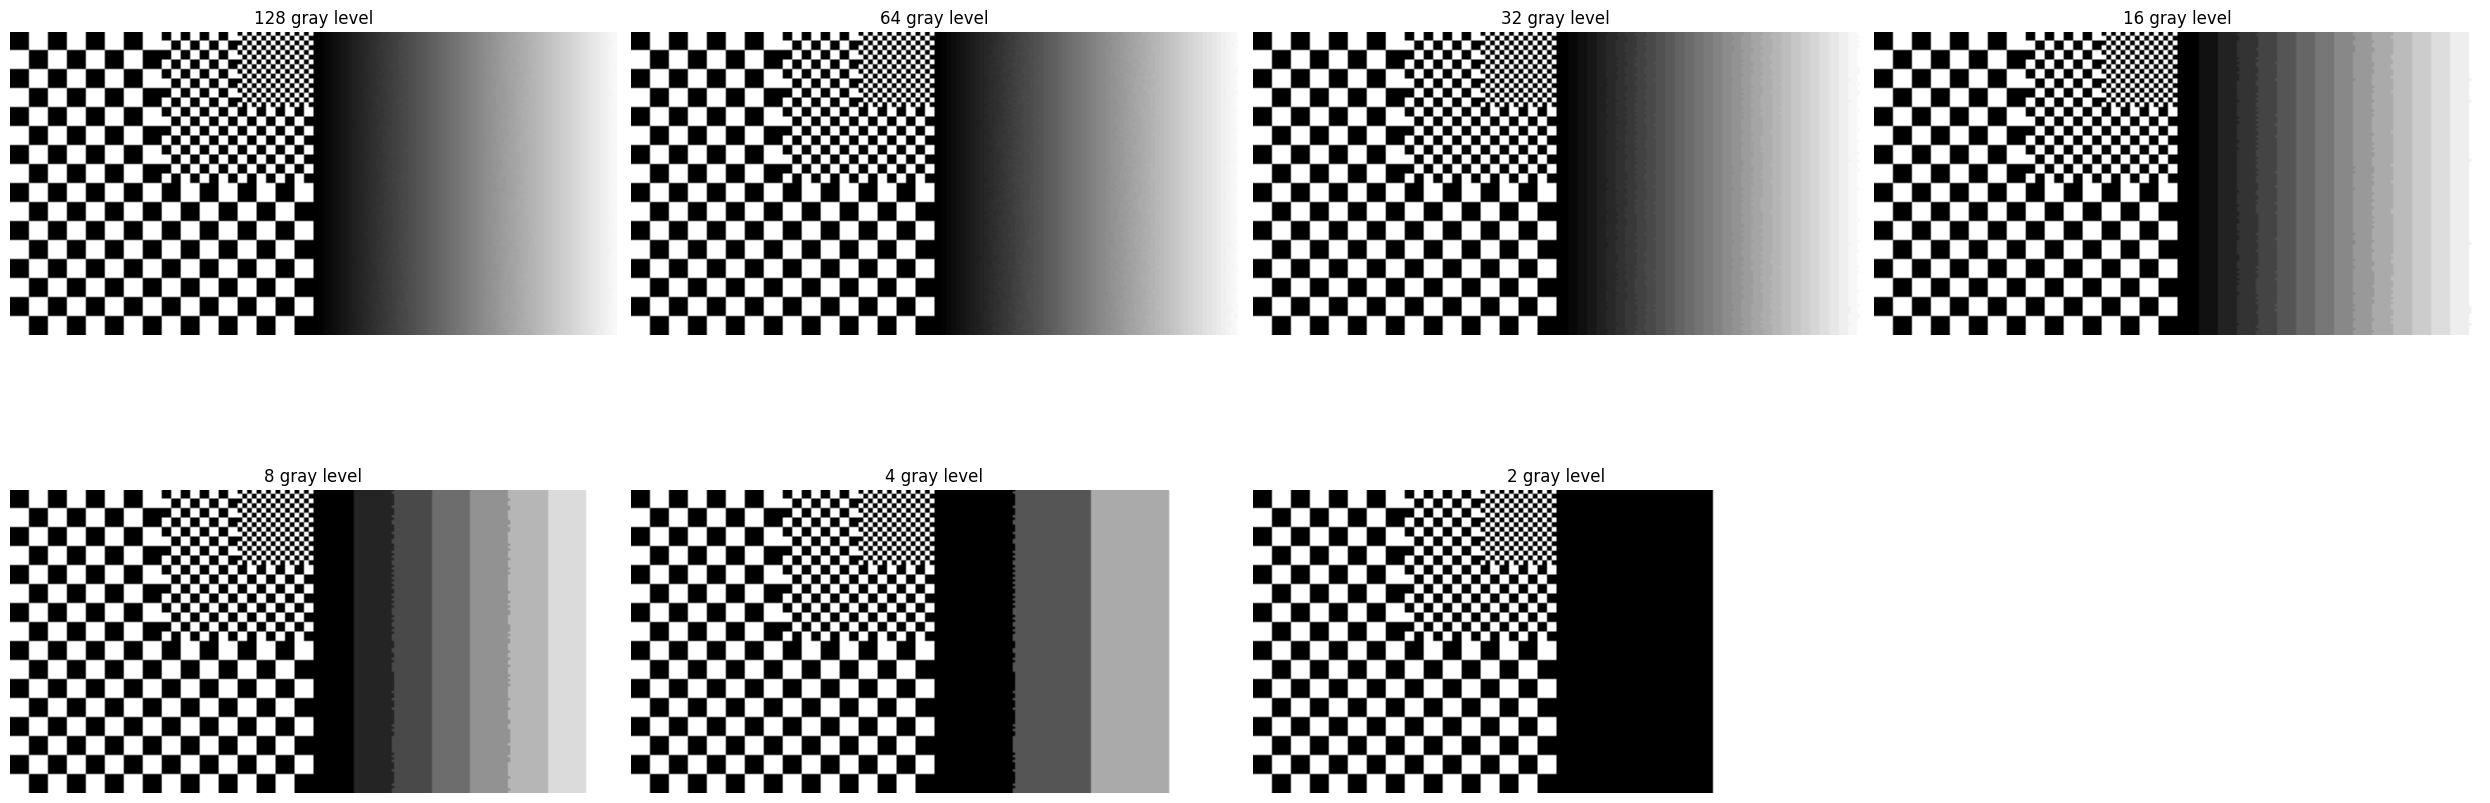

In [ ]:
#c) Image patterns
plt.figure(figsize=(25, 10))
for i, levels in enumerate(gray_levels):
    quantized_image = quantize_fun(image_patterns_array, levels)
    plt.subplot(2, 4, i + 1)
    plt.imshow(quantized_image, cmap='gray')
    plt.title(f'{levels} gray level')
    plt.axis('off')

plt.tight_layout()
plt.show()

### 4. Indexed color  
##### 4.1 Open and display the single channel image ‘chro’ without any map. 

In [ ]:
#Loading the image 'chro'
image_chro = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 1 - IP\\IP1\\IP1\\chro.tif")
image_chro_array = np.array(image_chro)

image_chro_array.shape

(256, 256)

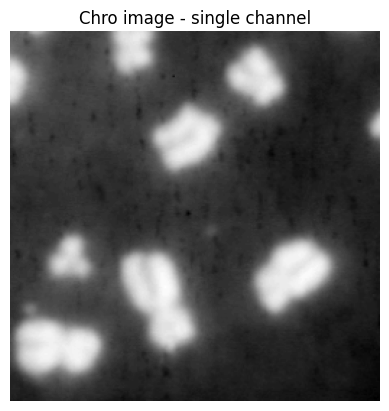

In [198]:
#Plot with single channel
plt.imshow(image_chro_array, cmap='gray') 
plt.title('Chro image - single channel')
plt.axis('off')  #Without axes
plt.show()

##### 4.2 Use its own, or ‘jet’, ‘hsv’, ‘hot’ and ‘lines’ color maps. Explain and comment. According to you, discuss about the context where these maps can be used.  

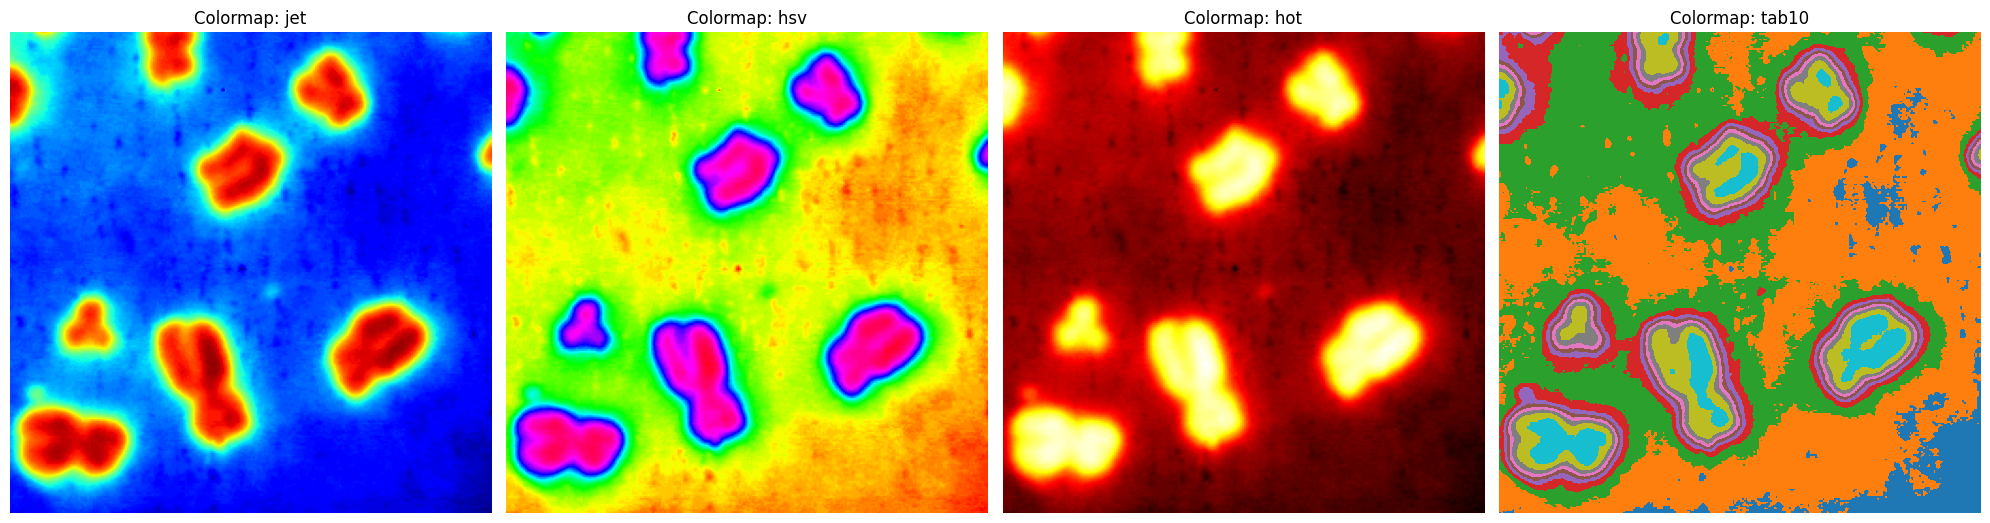

In [ ]:
#'lines' is not in matplot.lib. It is a colormap from Matlab. The most similar one is 'tab10'.
colormaps_list = ['jet', 'hsv', 'hot', 'tab10']

#Plot of the image with different colormaps
plt.figure(figsize=(20, 10))

for i, map in enumerate(colormaps_list):
    plt.subplot(1, len(colormaps_list), i + 1)
    plt.imshow(image_chro_array, cmap=map)
    plt.title(f'Colormap: {map}')
    plt.axis('off')  #Without axes

plt.tight_layout()
plt.show()

##### 4.3 Repeat question1 with the image ‘glucose’. Use the function ind2rgb to store the image as a RGB one. Store this image with and without compression and compare the different sizes.

In [ ]:
#Loading the image 'glucose'
image_glucose = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 1 - IP\\IP1\\IP1\\glucose.tif")
image_glucose_array = np.array(image_glucose)

image_glucose_array.shape

(261, 310)

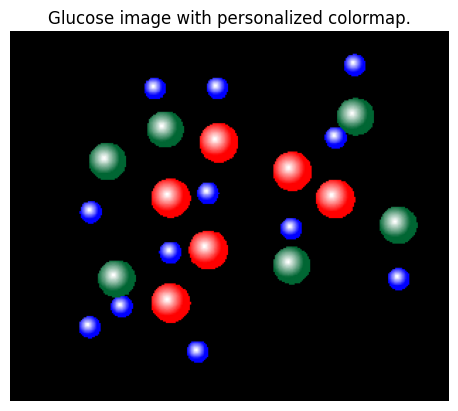

In [202]:
#In Python we don't have the function 'ind2rgb', but have 'mcolors' from matplotlib.colors.
#First, we take the colormap
palette = image_glucose.getpalette()

#Then, we convert the palette to RGB
if palette:
    #Converting the colormap in a list of tuples RGB
    RGB_palette = [tuple(palette[i:i+3]) for i in range(0, len(palette), 3)]
    #Creating a personalized colormap, though the normalization of RGB values in [0, 1]
    cmap = mcolors.ListedColormap(np.array(RGB_palette) / 255.0)
else:
    print("Colormap Error.")

#Plot
image_RGB = cmap(image_glucose_array / 255.0)[:, :, :3]  #We normalize the image

plt.imshow(image_RGB)
plt.title('Glucose image with personalized colormap.')
plt.axis('off') #Without axes
plt.show()

In [103]:
#Converting the array numpy in a object Image from PIL
image_RGB_PIL = Image.fromarray((image_RGB * 255).astype(np.uint8))

#Saving in TIFF format - without compression, and JPEG format - with compression
image_RGB_PIL.save("glucose no compression.tif")
image_RGB_PIL.save("glucose compression.jpg")

In [ ]:
print(f"JPEG size: {os.path.getsize('glucose compression.jpg')} bytes")
print(f"TIFF size: {os.path.getsize('glucose no compression.tif')} bytes")

JPEG size: 7466 bytes
TIFF size: 242870 bytes


##### 4.4 Display the three channels image ‘spectrum’. Transform this image to a single channel one using the color map ‘map.txt’ and rgb2ind. Comments.  

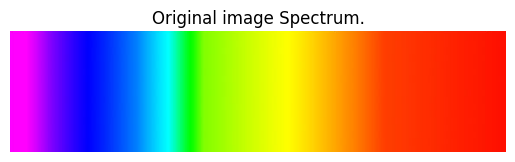

In [ ]:
#Loading the image 'spectrum'
image_spectrum= Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 1 - IP\\IP1\\IP1\\spectrum.png")
image_spectrum_array = np.array(image_spectrum)

#Plot of the original RGB image
plt.imshow(image_spectrum_array)
plt.title("Original image Spectrum.")
plt.axis("off") #Without axes
plt.show()

In [149]:
#Dimensions
image_spectrum_array.shape
#Four channels

(139, 572, 4)

In [ ]:
#Reading the colormap
colormap = np.loadtxt("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 1 - IP\\IP1\\IP1\\map.txt")
#Take a look
colormap
#'colormap' is a numpy array of lists of RGB values.

array([[0.0863, 0.    , 1.    ],
       [0.1059, 0.    , 1.    ],
       [0.1216, 0.    , 1.    ],
       [0.    , 0.0392, 1.    ],
       [0.149 , 0.    , 1.    ],
       [0.    , 0.0471, 1.    ],
       [0.    , 0.0549, 1.    ],
       [0.2392, 0.    , 1.    ],
       [0.2471, 0.    , 1.    ],
       [0.2627, 0.0039, 1.    ],
       [0.3216, 0.    , 1.    ],
       [0.2706, 0.0157, 1.    ],
       [0.    , 0.102 , 1.    ],
       [0.3333, 0.0078, 1.    ],
       [0.3843, 0.0039, 0.9922],
       [0.3373, 0.0196, 1.    ],
       [0.0941, 0.098 , 1.    ],
       [0.4275, 0.    , 1.    ],
       [0.4353, 0.    , 1.    ],
       [0.    , 0.1333, 1.    ],
       [0.4667, 0.    , 0.9922],
       [0.    , 0.1412, 1.    ],
       [0.4824, 0.    , 1.    ],
       [0.4902, 0.    , 1.    ],
       [0.5216, 0.    , 0.9922],
       [0.    , 0.1647, 1.    ],
       [0.5294, 0.0078, 1.    ],
       [0.5647, 0.    , 1.    ],
       [0.6   , 0.    , 1.    ],
       [0.6118, 0.    , 1.    ],
       [0.

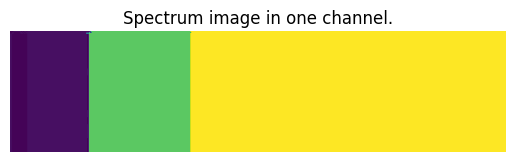

In [190]:
#Step 1: Create a personalized/custom colormap, through ListedColormap which takes an array of RGB colors. 
cmap = mcolors.ListedColormap(colormap)

#Step 2: Check to see if the image has four channels (RGBA). In this case we remove the alpha channel.
if image_spectrum_array.shape[2] == 4:
    image_spectrum_array = image_spectrum_array[..., :3]  #We maintain just the first three channels (RGB).

#Step 3: Reduce the RGB image to a single channel.
#We index the image based on the custom colormap by finding the closest color for each pixel.
#To do this, we create a function to find the index of the closest color in the colormap.
def rgb_to_index(rgb_image_pixel, colormap):
    #We calculate the Euclidean distance between the pixel of the image and all colors in the colormap.
    diff = np.linalg.norm(colormap - rgb_image_pixel, axis=1)
    return np.argmin(diff)  #Return the index of the closest color.

#Step 4: Apply the indexing function to the image.
#We create an empty array to store the indexed image.
indexed_image_spectrum = np.zeros((image_spectrum_array.shape[0], image_spectrum_array.shape[1]), dtype=int)

#Iterating over each pixel of the image to find its index in the colormap.
for i in range(image_spectrum_array.shape[0]):
    for j in range(image_spectrum_array.shape[1]):
        #Getting the index of the closest color in the colormap for the current pixel.
        indexed_image_spectrum[i, j] = rgb_to_index(image_spectrum_array[i, j, :3], colormap)

#Plot of the imndexed image
plt.imshow(indexed_image_spectrum)
plt.title("Spectrum image in one channel.")
plt.axis("off") #Without axes
plt.show()

##### 4.5 Using again this map, transform the RGB image ‘umbrella’ in a single channel image. Comments.

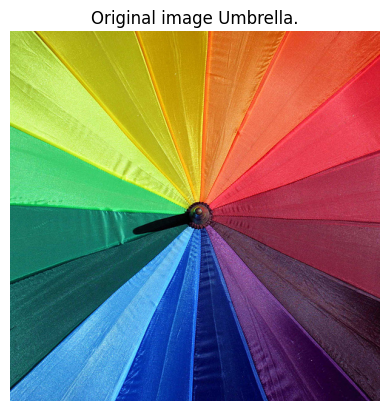

In [ ]:
#Loading the image 'umbrella'
image_umbrella= Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 1 - IP\\IP1\\IP1\\umbrella.jpg")
image_umbrella_array = np.array(image_umbrella)

#Plot of the original RGB image
plt.imshow(image_umbrella_array)
plt.title("Original image Umbrella.")
plt.axis("off") #Without axes
plt.show()

In [153]:
#Dimensions
image_umbrella_array.shape
#Just three channels

(500, 500, 3)

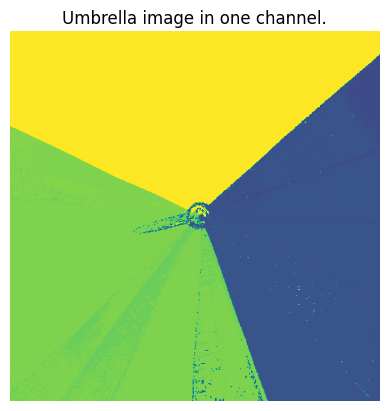

In [194]:
#We repeat the same steps done for image 'spectrum'.
#Step 1, Step 2 and Step 3 are avoided. The first one since cmap was already created before, the second one since the image array of 'umbrella' has just 3 channels RGB,
#and the third one since the function rgb_to_index is always the same.

#Step 4: Apply the indexing function to the image.
#We create an empty array to store the indexed image.
indexed_image_umbrella = np.zeros((image_umbrella_array.shape[0], image_umbrella_array.shape[1]), dtype=int)

#Iterating over each pixel of the image to find its index in the colormap.
for i in range(image_umbrella_array.shape[0]):
    for j in range(image_umbrella_array.shape[1]):
        #Getting the index of the closest color in the colormap for the current pixel.
        indexed_image_umbrella[i, j] = rgb_to_index(image_umbrella_array[i, j,:], colormap)

#Plot of the imndexed image
plt.imshow(indexed_image_umbrella)
plt.title("Umbrella image in one channel.")
plt.axis("off") #Without axes
plt.show()